In [6]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [7]:
dry_run = False
epochs = 10
repeat_count = 100

Using genre from playlist source
Dups for 0-6:   1
Dups for 0-7:   1
Dups for 1-4:  10
Dups for 2-7:   3
Dups for 5-7:   1
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 106.8165 seconds


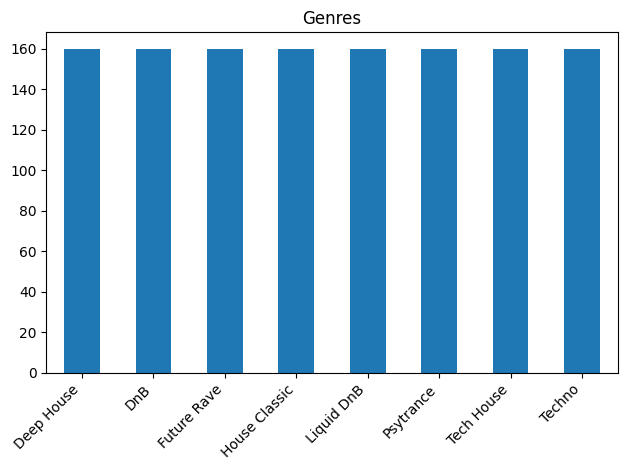

In [8]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(n_mels=128, win_length=1024),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run,
        #max_frames=16000*60*1
)

analysis.summarize_dataset(dataset)

Starting training for 10 epoch


  0%|          | 0.00/10.0 [00:00<?, ?epochs/s]

Epoch   1/10, train_loss: 1.901, train_acc: 0.389, val_loss: 1.787, val_acc: 0.511, in 54.05s
Epoch   2/10, train_loss: 1.752, train_acc: 0.544, val_loss: 1.703, val_acc: 0.587, in 51.18s
Epoch   3/10, train_loss: 1.692, train_acc: 0.599, val_loss: 1.674, val_acc: 0.611, in 51.70s
Epoch   4/10, train_loss: 1.665, train_acc: 0.624, val_loss: 1.654, val_acc: 0.632, in 50.44s
Epoch   5/10, train_loss: 1.641, train_acc: 0.645, val_loss: 1.645, val_acc: 0.636, in 52.05s
Epoch   6/10, train_loss: 1.626, train_acc: 0.659, val_loss: 1.634, val_acc: 0.647, in 51.47s
Epoch   7/10, train_loss: 1.613, train_acc: 0.671, val_loss: 1.627, val_acc: 0.653, in 51.68s
Epoch   8/10, train_loss: 1.602, train_acc: 0.680, val_loss: 1.617, val_acc: 0.662, in 51.53s
Epoch   9/10, train_loss: 1.591, train_acc: 0.691, val_loss: 1.618, val_acc: 0.661, in 52.79s
Epoch  10/10, train_loss: 1.581, train_acc: 0.700, val_loss: 1.620, val_acc: 0.659, in 51.71s
Training finished in: 518.6278 seconds
test_loss: 1.658, tes

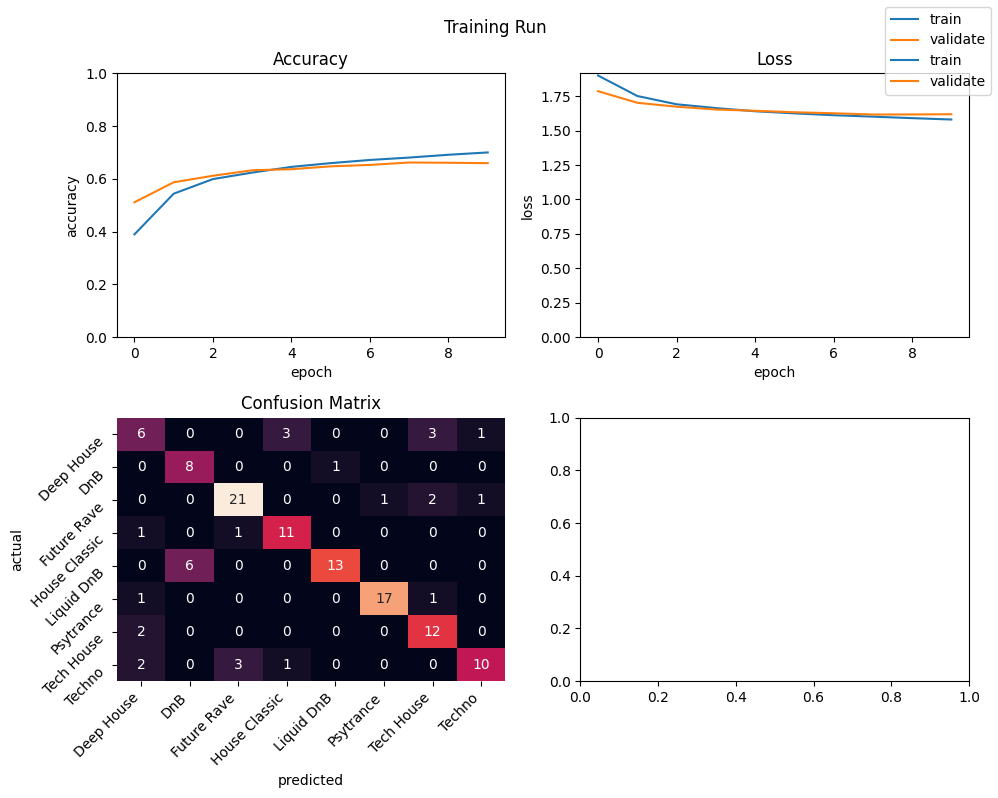

In [9]:
model = networks.MusicRecNet(dataset.num_classes)
run = TrainingRun(dataset, model, batch_size=128, epochs=epochs, dry_run=dry_run, repeat_count=repeat_count)
run.start()
run.test()
run.plot()